In [1]:
import numpy as np
import sys
#np.set_printoptions(precision=5, linewidth=200, suppress=True)
import psi4
from helper_PFCI import PFHamiltonianGenerator
from helper_PFCI import Determinant
from helper_cqed_rhf import cqed_rhf
np.set_printoptions(threshold=sys.maxsize)
psi4.core.set_output_file('output.dat', False)

In [2]:
# options for mgf
mol_str = """
Li
H 1 1.5
symmetry c1
"""

options_dict = {
    "basis": "sto-3g",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
    "save_jk" : True
}


psi4.set_options(options_dict)
mol = psi4.geometry(mol_str)


In [3]:
mol_str = """
Li
H 1 1.5
symmetry c1
"""

options_dict = {
    "basis": "sto-3g",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
}

cavity_dict = {
    'omega_value' : 0.0,
    'lambda_vector' : np.array([0, 0, 0]),
    'ci_level' : 'fci',
    'full_diagonalization' : True,
    'number_of_photons' : 0
}

mol = psi4.geometry(mol_str)

psi4.set_options(options_dict)

test_pf = PFHamiltonianGenerator(
    mol_str,
    options_dict,
    cavity_dict
)




Start SCF iterations:

Canonical RHF One-electron energy = -12.5626302721254959
CQED-RHF One-electron energy      = -12.5626302721254959
Nuclear repulsion energy          = 1.0583544213400000
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8633576215383263   dE = -7.86336E+00   dRMS = 3.54673E-13
SCF Iteration   2: Energy = -7.8633576215383370   dE = -1.06581E-14   dRMS = 7.99578E-14
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.86335762 hartree
Psi4  SCF energy: -7.86335762 hartree
 Completed QED-RHF in 0.2856869697570801 seconds
 Completed 1HSO Build in 3.409385681152344e-05 seconds
 Completed ERI Build in 0.0011310577392578125 seconds 
 Completed 2D build in 8.082389831542969e-05 seconds
 Completed 1G build in 1.4066696166992188e-05 seconds
 Completed the Dipole Matrix Build in 4.410743713378906e-05 seconds
 Completed determinant list in 0.0004711151123046875 seconds 
 Completed constant offset matrix in 0.0001568794250488

In [4]:
N_el = 20
#test_pf.reduceCISpace()
singlet_states = test_pf.sort_dipole_allowed_states(N_el)
print(singlet_states)


[0, 2, 5, 6, 8, 14, 15, 16, 17, 21, 22, 23, 24, 26, 29, 30, 38, 40, 41, 49]


In [5]:
N_el = 20
#test_pf.reduceCISpace()
singlet_states = test_pf.sort_dipole_allowed_states(N_el)
print(singlet_states)

[0, 2, 5, 6, 8, 14, 15, 16, 17, 21, 22, 23, 24, 26, 29, 30, 38, 40, 41, 49]


In [6]:
print(test_pf.compute_dipole_moments(singlet_states))
print(test_pf.CIeigs[singlet_states])

[[[ 1.39268461e-15  1.16301812e-15 -1.82288146e+00]
  [ 7.50236804e-15  7.43351177e-15  6.69131627e-01]
  [ 1.24542920e+00  6.60115855e-01 -4.57184430e-15]
  [ 6.60115855e-01 -1.24542920e+00  6.20687401e-16]
  [ 2.57272550e-15  4.05305125e-16  3.76232818e-01]
  [ 8.56814648e-15  1.10675877e-14  6.28943285e-01]
  [-6.09031877e-02 -9.76448927e-02  6.82675065e-14]
  [-9.76448927e-02  6.09031877e-02  1.64683767e-15]
  [ 1.32675591e-15 -2.87437460e-16  8.15924833e-02]
  [ 7.21392967e-03 -7.57645375e-02 -1.49553095e-15]
  [-7.57645375e-02 -7.21392967e-03 -1.94695467e-15]
  [ 1.86108357e-16 -4.27801400e-16  4.40126361e-02]
  [-4.47024244e-16  1.29898523e-16 -7.92363071e-02]
  [ 9.02119554e-16 -2.40455709e-15  2.15979931e-01]
  [ 1.60470820e-01 -2.54179863e-01 -1.61559480e-15]
  [-2.54179863e-01 -1.60470820e-01 -1.06877854e-16]
  [ 2.50467830e-16 -3.00124343e-16 -4.58432478e-02]
  [ 9.69499501e-03 -2.21731073e-02 -2.46309711e-16]
  [-2.21731073e-02 -9.69499501e-03  5.34259049e-16]
  [ 1.886376

In [7]:
print(test_pf.MU_Z)

[[-3.31347966e+00  3.81296251e-01  1.07088934e-15 -6.87059192e-16
  -6.20669297e-01 -1.47032006e-01 -7.94893999e-17  1.38447189e-16
  -1.07799213e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  3.81296251e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.07088934e-15  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -6.87059192e-16  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -6.20669

In [8]:
mol_tmpl = """
Li
H 1 **R**
symmetry c1
"""

mol_str = """
Li
H 1 1.5
symmetry c1
"""

N_R = 50
N_el = 20
r_array = np.linspace(1.4, 2.2, N_R)

E_array = np.zeros((N_R, N_el))
Mu_array = np.zeros((N_R, N_el, N_el, 3))
psi4.set_options(options_dict)

r_idx = 0
for r in r_array:
    mol_str = mol_tmpl.replace("**R**", str(r))
    print(mol_str)
    mol = psi4.geometry(mol_str)
    #psi4.set_options({'restricted_docc': [3],'active': [4],'num_roots':2})
    scf_e, wfn = psi4.energy('SCF', return_wfn=True)
    fci_energy = psi4.energy('fci',ref_wfn=wfn)
    
    LiH = PFHamiltonianGenerator(mol_str, options_dict, cavity_dict)
    assert np.isclose(fci_energy, LiH.CIeigs[0])
    #LiH.reduceCISpace()
    singlet_states = LiH.sort_dipole_allowed_states( N_el)
    E_array[r_idx, :] = LiH.CIeigs[singlet_states]
    Mu_array[r_idx, :, :, :] = LiH.compute_dipole_moments(singlet_states)
    r_idx += 1
    
    
    #CASCI_E_array.append(H2_PF.CIeigs[0])
    #FCI_E_array.append(fci_energy)
    #print(r, H2_PF.CIeigs[0])



Li
H 1 1.4
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.6946346236295895
CQED-RHF One-electron energy      = -12.6946346236295895
Nuclear repulsion energy          = 1.1339511657214287
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8605386610570385   dE = -7.86054E+00   dRMS = 1.78770E-13
SCF Iteration   2: Energy = -7.8605386610570473   dE = -8.88178E-15   dRMS = 3.97284E-14
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.86053866 hartree
Psi4  SCF energy: -7.86053866 hartree
 Completed QED-RHF in 0.08657312393188477 seconds
 Completed 1HSO Build in 4.6253204345703125e-05 seconds
 Completed ERI Build in 0.001271963119506836 seconds 
 Completed 2D build in 0.00016498565673828125 seconds
 Completed 1G build in 1.811981201171875e-05 seconds
 Completed the Dipole Matrix Build in 4.1961669921875e-05 seconds
 Completed determinant list in 0.0005030632019042969 seconds 
 Completed constant offset matr

 Completed Hamiltonian build in 0.3395709991455078 seconds

Li
H 1 1.530612244897959
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.5241587898228026
CQED-RHF One-electron energy      = -12.5241587898228026
Nuclear repulsion energy          = 1.0371873329132002
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8633023030157272   dE = -7.86330E+00   dRMS = 2.68148E-13
SCF Iteration   2: Energy = -7.8633023030157201   dE =  7.10543E-15   dRMS = 5.97575E-14
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.86330230 hartree
Psi4  SCF energy: -7.86330230 hartree
 Completed QED-RHF in 0.0867929458618164 seconds
 Completed 1HSO Build in 2.7894973754882812e-05 seconds
 Completed ERI Build in 0.0011477470397949219 seconds 
 Completed 2D build in 0.00010919570922851562 seconds
 Completed 1G build in 1.4066696166992188e-05 seconds
 Completed the Dipole Matrix Build in 3.886222839355469e-05 seconds
 Completed determ

 Completed Hamiltonian build in 0.34102296829223633 seconds

Li
H 1 1.6612244897959183
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.3692821733550495
CQED-RHF One-electron energy      = -12.3692821733550495
Nuclear repulsion energy          = 0.9556394345023342
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8593008679750440   dE = -7.85930E+00   dRMS = 2.89643E-15
SCF Iteration   2: Energy = -7.8593008679750422   dE =  1.77636E-15   dRMS = 7.61755E-16
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.85930087 hartree
Psi4  SCF energy: -7.85930087 hartree
 Completed QED-RHF in 0.0895528793334961 seconds
 Completed 1HSO Build in 2.7894973754882812e-05 seconds
 Completed ERI Build in 0.0011401176452636719 seconds 
 Completed 2D build in 0.00010395050048828125 seconds
 Completed 1G build in 1.5020370483398438e-05 seconds
 Completed the Dipole Matrix Build in 3.886222839355469e-05 seconds
 Completed dete

 Completed Hamiltonian build in 0.34035420417785645 seconds

Li
H 1 1.7918367346938777
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.2279483802846354
CQED-RHF One-electron energy      = -12.2279483802846354
Nuclear repulsion energy          = 0.8859800679782459
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8506745764107793   dE = -7.85067E+00   dRMS = 5.05083E-15
SCF Iteration   2: Energy = -7.8506745764107757   dE =  3.55271E-15   dRMS = 1.33471E-15
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.85067458 hartree
Psi4  SCF energy: -7.85067458 hartree
 Completed QED-RHF in 0.08945703506469727 seconds
 Completed 1HSO Build in 2.8848648071289062e-05 seconds
 Completed ERI Build in 0.0011363029479980469 seconds 
 Completed 2D build in 8.392333984375e-05 seconds
 Completed 1G build in 1.3828277587890625e-05 seconds
 Completed the Dipole Matrix Build in 4.029273986816406e-05 seconds
 Completed determi

 Completed Hamiltonian build in 0.3409428596496582 seconds

Li
H 1 1.9224489795918367
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.0985141762878570
CQED-RHF One-electron energy      = -12.0985141762878570
Nuclear repulsion energy          = 0.8257860930837581
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8389192441347433   dE = -7.83892E+00   dRMS = 5.36166E-15
SCF Iteration   2: Energy = -7.8389192441347486   dE = -5.32907E-15   dRMS = 1.35759E-15
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.83891924 hartree
Psi4  SCF energy: -7.83891924 hartree
 Completed QED-RHF in 0.09077620506286621 seconds
 Completed 1HSO Build in 2.8848648071289062e-05 seconds
 Completed ERI Build in 0.0011398792266845703 seconds 
 Completed 2D build in 8.0108642578125e-05 seconds
 Completed 1G build in 1.3828277587890625e-05 seconds
 Completed the Dipole Matrix Build in 4.029273986816406e-05 seconds
 Completed determi

 Completed Hamiltonian build in 0.34119486808776855 seconds

Li
H 1 2.053061224489796
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -11.9796907659129843
CQED-RHF One-electron energy      = -11.9796907659129843
Nuclear repulsion energy          = 0.7732509937225647
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8250927429137160   dE = -7.82509E+00   dRMS = 3.20782E-15
SCF Iteration   2: Energy = -7.8250927429137231   dE = -7.10543E-15   dRMS = 9.34040E-16
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.82509274 hartree
Psi4  SCF energy: -7.82509274 hartree
 Completed QED-RHF in 0.09109997749328613 seconds
 Completed 1HSO Build in 2.7894973754882812e-05 seconds
 Completed ERI Build in 0.0011298656463623047 seconds 
 Completed 2D build in 9.107589721679688e-05 seconds
 Completed 1G build in 1.5020370483398438e-05 seconds
 Completed the Dipole Matrix Build in 4.1961669921875e-05 seconds
 Completed determi

 Completed Hamiltonian build in 0.33968400955200195 seconds

Li
H 1 2.183673469387755
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -11.8704521229909687
CQED-RHF One-electron energy      = -11.8704521229909687
Nuclear repulsion energy          = 0.7270004669952337
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8099506130038581   dE = -7.80995E+00   dRMS = 6.41765E-15
SCF Iteration   2: Energy = -7.8099506130038581   dE =  0.00000E+00   dRMS = 1.84787E-15
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.80995061 hartree
Psi4  SCF energy: -7.80995061 hartree
 Completed QED-RHF in 0.09034419059753418 seconds
 Completed 1HSO Build in 2.7179718017578125e-05 seconds
 Completed ERI Build in 0.0011339187622070312 seconds 
 Completed 2D build in 8.320808410644531e-05 seconds
 Completed 1G build in 1.4781951904296875e-05 seconds
 Completed the Dipole Matrix Build in 3.981590270996094e-05 seconds
 Completed deter

In [9]:
from matplotlib import pyplot as plt


[1.4        1.41632653 1.43265306 1.44897959 1.46530612 1.48163265
 1.49795918 1.51428571 1.53061224 1.54693878 1.56326531 1.57959184
 1.59591837 1.6122449  1.62857143 1.64489796 1.66122449 1.67755102
 1.69387755 1.71020408 1.72653061 1.74285714 1.75918367 1.7755102
 1.79183673 1.80816327 1.8244898  1.84081633 1.85714286 1.87346939
 1.88979592 1.90612245 1.92244898 1.93877551 1.95510204 1.97142857
 1.9877551  2.00408163 2.02040816 2.03673469 2.05306122 2.06938776
 2.08571429 2.10204082 2.11836735 2.13469388 2.15102041 2.16734694
 2.18367347 2.2       ]
[0.14221792 0.14162321 0.14099345 0.14033042 0.13963584 0.1389114
 0.13815872 0.13737938 0.13657493 0.13574686 0.13489661 0.13402559
 0.13313517 0.13222666 0.13130135 0.13036048 0.12940526 0.12843685
 0.12745639 0.12646497 0.12546368 0.12445353 0.12343555 0.1224107
 0.12137995 0.12034421 0.11930439 0.11826138 0.11721602 0.11616917
 0.11512164 0.11407423 0.11302774 0.11198294 0.11094058 0.10990141
 0.10886617 0.10783559 0.10681036 0.10579

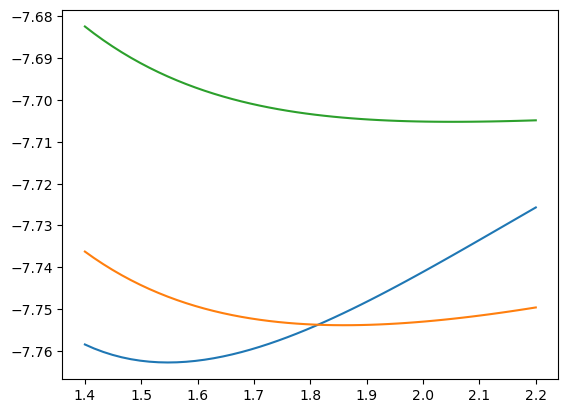

In [10]:
print(r_array)
print(E_array[:,1]-E_array[:,0])

plt.plot(r_array, E_array[:,0]+0.120000)
plt.plot(r_array, E_array[:,1])
plt.plot(r_array, E_array[:,2])

plt.show()

\begin{equation}
\hat{H}_{\alpha n, \beta m} = \left( E_{\alpha}(R) + n \omega \right) \delta_{\alpha \beta} \delta_{nm} + \sqrt{\frac{\omega}{2}} \lambda \cdot \mu_{\alpha \beta}(R) \left(\sqrt{n} \delta_{n,m-1} + \sqrt{n+1} \delta_{n,m+1} \right)  \\
+\frac{1}{2} \sum_{\gamma = 1}^N \lambda \cdot \mu_{\alpha, \gamma}(R) \lambda \cdot \mu_{\gamma, \beta} \delta_{nm}
\end{equation}


In [11]:
def build_pf_hamiltonian(n_el, n_ph, E_R, omega, lamvec, mu):
    """
    Given an array of n_el E_R values and an n_ph states with fundamental energy omega
    build the PF Hamiltonian
    
    n_el : int
        the number of electronic states (n_el = 1 means only ground-state)
    
    n_ph : int
        the number of photon occupation states (n_ph = 1 means only the |0> state)
    
    E_R : np.array of floats
        the electronic energies
        
    omega : float
        the energy of the photonic mode
        
    lamvec : np.array of floats
        the lambda vector
        
    mu : (n_el x n_el x 3) np.array of floats 
        mu[i, j, k] is the kth cartesian component of the dipole moment expectation value between 
        state i and state j
    
    """
    H_PF = np.zeros((n_el * n_ph, n_el * n_ph))
    
    # take care of the diagonals first
    # bare electronic and photonic energy
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            H_PF[na,na] = E_R[a] + n * omega
        
    # diagonal dipole self energy
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            for g in range(n_el):
                H_PF[na,na] += 0.5 * np.dot(lamvec, mu[a,g,:]) * np.dot(lamvec, mu[g,a,:])
            
    # off-diagonal dipole self energy
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            for b in range(n_el):
                nb = n * n_el + b
                for g in range(n_el):
                    if a != b:
                        H_PF[na, nb] += 0.5 * np.dot(lamvec, mu[a,g,:]) * np.dot(lamvec, mu[g, b, :])
                
    # off-diagonal bilinear coupling
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            
            for m in range(n_ph):
                for b in range(n_el):
                    mb = m * n_el + b
                    
                    if n == (m-1) and a != b:
                        #print(n, a, na, m, b, mb)
                        H_PF[na,mb] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m) 
                        H_PF[mb, na] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m) 
                        
                    elif n == (m+1) and a != b:
                        #print(n, a, na, m, b, mb)
                        H_PF[na, mb] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m+1) 
                        H_PF[mb, na] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m+1)
                        
    
    return H_PF
                
            
    
        
    
    

\begin{equation}
\hat{H}_{\alpha n, \beta m} = \left( E_{\alpha}(R) + n \omega \right) \delta_{\alpha \beta} \delta_{nm} + \sqrt{\frac{\omega}{2}} \lambda \cdot \mu_{\alpha \beta}(R) \left(\sqrt{n} \delta_{n,m-1} + \sqrt{n+1} \delta_{n,m+1} \right)  \\
+\frac{1}{2} \sum_{\gamma = 1}^N \lambda \cdot \mu_{\alpha, \gamma}(R) \lambda \cdot \mu_{\gamma, \beta} \delta_{nm}
\end{equation}


In [17]:
np.set_printoptions(precision=6, linewidth=200, suppress=True)
omega_cav = 0.120000
lambda_vector = np.array([0, 0.0, 0.025])
N_el = 20
N_ph = 20
# Just manually computing some elements!
#print("E")
#print(E_array[0,:2], E_array[0,:2]+0.12, E_array[0,:2]+2*0.12)

#g_12 = np.sqrt(omega_cav / 2) * np.dot(lambda_vector, Mu_array[0, 0, 1, :]) * np.sqrt(2)
#D_01 = 0.5 * np.dot(lambda_vector, Mu_array[0, 0, 0, :]) * np.dot(lambda_vector, Mu_array[0, 1, 0, :]) 
#D_01 += 0.5 * np.dot(lambda_vector, Mu_array[0, 0, 1, :]) * np.dot(lambda_vector, Mu_array[0, 1, 1, :])
#print("g12 * 1")
#print(g_12)
#print("D01")
#print(D_01)
#+E_array[0,1])

_HPF = build_pf_hamiltonian(N_el, N_ph, E_array[0,:], omega_cav, lambda_vector, Mu_array[0, :, :, :])
print("H")
print(_HPF)

H
[[-7.877154 -0.000181  0.        0.       -0.000173 -0.000699 -0.       -0.       -0.000287  0.       -0.       -0.000233  0.000218 -0.000117  0.       -0.       -0.000042  0.       -0.
  -0.        0.       -0.003693  0.        0.       -0.001868 -0.003336 -0.       -0.       -0.000537  0.       -0.       -0.000253  0.000393 -0.001346  0.       -0.       -0.000232  0.
  -0.       -0.        0.        0.        0.        0.        0.        0.        0.        0.        0.        0.        0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.        0.        0.        0.        0.        0.        0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.        0.        0.        0.        0.        0.        0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.   

In [18]:
N_el = 20
N_ph = 20

PF_EIG = np.zeros((N_R, N_el * N_ph))

In [25]:

for i in range(N_R):
    _HPF = build_pf_hamiltonian(N_el, N_ph, E_array[i,:], omega_cav, lambda_vector, Mu_array[i, :, :, :])
    pf_e, pf_c = np.linalg.eigh(_HPF)
    PF_EIG[i,:] = pf_e
    print(F'[{r_array[i]}, {pf_e[0]}, {pf_e[1]},  {pf_e[2]}, {pf_e[2]}],')

[1.4, -7.877226809519587, -7.757917465066483,  -7.7343307256227245, -7.7343307256227245],
[1.4163265306122448, -7.878182902550236, -7.7589144666345105,  -7.735842282297653, -7.735842282297653],
[1.4326530612244897, -7.8790030479591575, -7.759778901828479,  -7.737249882024182, -7.737249882024182],
[1.4489795918367345, -7.879694018639106, -7.760517935675106,  -7.738558123439453, -7.738558123439453],
[1.4653061224489796, -7.880262264116102, -7.761138469652131,  -7.7397712706532715, -7.7397712706532715],
[1.4816326530612245, -7.880713929816529, -7.761647171695738,  -7.740893261088976, -7.740893261088976],
[1.4979591836734694, -7.881054874894629, -7.76205050691835,  -7.741927709698678, -7.741927709698678],
[1.5142857142857142, -7.881290688741532, -7.762354769579052,  -7.74287790924611, -7.74287790924611],
[1.530612244897959, -7.8814267062880745, -7.76256611689351,  -7.743746826289557, -7.743746826289557],
[1.546938775510204, -7.881468022205304, -7.762690605296552,  -7.74453709245481, -7.744

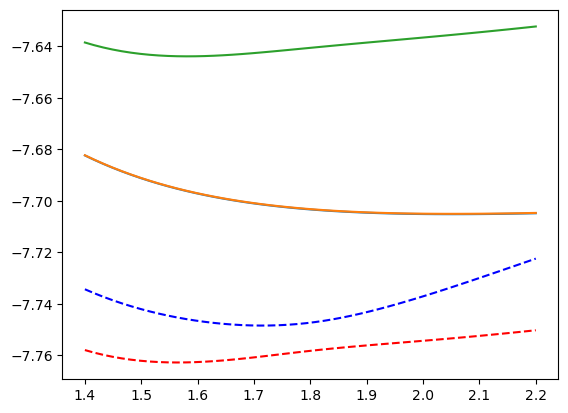

In [22]:
#plt.plot(r_array, PF_EIG[:,0])
#plt.plot(r_array, E_array[:,1])
plt.plot(r_array, PF_EIG[:,1], 'r--')
plt.plot(r_array, PF_EIG[:,2], 'b--')
#plt.plot(r_array, E_array[:,0]+omega_cav)
#plt.plot(r_array, E_array[:,2])
plt.plot(r_array, E_array[:,3])
#plt.plot(r_array, PF_EIG[:,3])
plt.plot(r_array, PF_EIG[:,4])
plt.plot(r_array, PF_EIG[:,5])





In [ ]:
pf_e, pf_c = np.linalg.eigh(_HPF)
print(pf_e)

In [ ]:
print(pf_e[2]-pf_e[0])
#print(pf_e[3])
print(omega_cav)
#print(pf_e[1]-pf_e[0])
#print(pf_e[2]-pf_e[1])

In [ ]:
expected_mghp_g_e = -199.86358254419457
expected_mghp_lp_e = -199.69776087489558
expected_mghp_up_e = -199.68066502792058

print(expected_mghp_lp_e-expected_mghp_g_e)
print(expected_mghp_up_e-expected_mghp_lp_e)

In [ ]:
np.set_printoptions(precision=3, linewidth=200, suppress=True)
_Np = 2
_numDets = 3
_compDim = _Np * _numDets
o = np.eye(_numDets) * 0.1
print(o)
b1 = np.ones((_numDets, _numDets))
b2 = 0.5 * b1
H = np.zeros((_compDim, _compDim))
print(H)

In [ ]:
H = np.zeros((_compDim, _compDim))
print(H)

# loop for diagonal blocks
for i in range(_Np):
    bra_s = i * _numDets
    bra_e = (i+1) * _numDets
    
    ket_s = bra_s
    ket_e = bra_e
    H[bra_s:bra_e, ket_s:ket_e] = b1 + o * i
    
# loop for g blocks
for i in range(_Np):
    if i==0:
        j = i + 1
        bra_s = i * _numDets
        bra_e = (i+1) * _numDets
        ket_s = j * _numDets
        ket_e = (j+1) * _numDets
        
        H[bra_s:bra_e, ket_s:ket_e] = b2 * np.sqrt(j)
        
    elif i== (_Np - 1):
        j = i - 1
        bra_s = i * _numDets
        bra_e = (i+1) * _numDets
        ket_s = j * _numDets
        ket_e = (j+1) * _numDets
        
        H[bra_s:bra_e, ket_s:ket_e] = b2 * np.sqrt(j+1)
        
    else:
        j = i + 1
        bra_s = i * _numDets
        bra_e = (i+1) * _numDets
        ket_s = j * _numDets
        ket_e = (j+1) * _numDets
        
        H[bra_s:bra_e, ket_s:ket_e] = b2 * np.sqrt(j)
        
        j = i - 1
        bra_s = i * _numDets
        bra_e = (i+1) * _numDets
        ket_s = j * _numDets
        ket_e = (j+1) * _numDets
        
        H[bra_s:bra_e, ket_s:ket_e] = b2 * np.sqrt(j+1)
        
        
        
    
#for i in range(_Np):
#    bra_b = i * _numDets
#    bra_e = bra_b + _numDets
#    for j in range(i, _Np):
#        ket_b = j * _numDets
#        ket_e = ket_b + _numDets
#        if i==j:
#            H[bra_b:bra_e, ket_b:ket_e] = b1 + o * j
#        elif i==j+1:
#            H[bra_b:bra_e, ket_b:ket_e] = b2 * np.sqrt(j)
#            H[ket_b:ket_e, bra_b:bra_e] = b2 * np.sqrt(j)
#        elif i==j-1:
#            H[bra_b:bra_e, ket_b:ket_e] = b2 * np.sqrt(j+1)
#            H[ket_b:ket_e, bra_b:bra_e] = b2 * np.sqrt(j+1)

            
print(H)           
        